In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''
Example entries in the csv
Domain,Recursive,Iterative,Delegated,Visited domains
163.com,0,0,0,{}
1drv.com,589.0,42.0,,"{""'onedrive.live.com.'"": {'recursive': 307.0, 'iterative': 14.0, 'delegated': None, 'count': 1}}"
1rx.io,131.0,35.0,0,"{""'1rx.io.'"": {'recursive': 78.0, 'iterative': 17.0, 'delegated': 58.45, 'count': 1}}"
2miners.com,1035.0,421.0,,"{""'2miners.com.'"": {'recursive': 50.0, 'iterative': 161.0, 'delegated': 26.599999999999998, 'count': 3}, ""'static-l.2miners.com.'"": {'recursive': 556.0, 'iterative': 122.0, 'delegated': None, 'count': 7}, ""'www.googletagmanager.com.'"": {'recursive': 225.0, 'iterative': 59.0, 'delegated': None, 'count': 3}, ""'mc.yandex.ru.'"": {'recursive': 14.0, 'iterative': 15.0, 'delegated': None, 'count': 1}}"
'''

'\nExample entries in the csv\nDomain,Recursive,Iterative,Delegated,Visited domains\n163.com,0,0,0,{}\n1drv.com,589.0,42.0,,"{""\'onedrive.live.com.\'"": {\'recursive\': 307.0, \'iterative\': 14.0, \'delegated\': None, \'count\': 1}}"\n1rx.io,131.0,35.0,0,"{""\'1rx.io.\'"": {\'recursive\': 78.0, \'iterative\': 17.0, \'delegated\': 58.45, \'count\': 1}}"\n2miners.com,1035.0,421.0,,"{""\'2miners.com.\'"": {\'recursive\': 50.0, \'iterative\': 161.0, \'delegated\': 26.599999999999998, \'count\': 3}, ""\'static-l.2miners.com.\'"": {\'recursive\': 556.0, \'iterative\': 122.0, \'delegated\': None, \'count\': 7}, ""\'www.googletagmanager.com.\'"": {\'recursive\': 225.0, \'iterative\': 59.0, \'delegated\': None, \'count\': 3}, ""\'mc.yandex.ru.\'"": {\'recursive\': 14.0, \'iterative\': 15.0, \'delegated\': None, \'count\': 1}}"\n'

In [3]:
csv_file = 'result-delegation.csv'

In [4]:
df = pd.read_csv(csv_file)
df.head()

,Domain,Recursive,Iterative,Delegated,Visited domains
0,163.com,0.0,0.0,0.0,{}
1,1drv.com,589.0,42.0,NaN,"{""'onedrive.live.com.'"": {'recursive': 307.0, ..."
2,1rx.io,131.0,35.0,0.0,"{""'1rx.io.'"": {'recursive': 78.0, 'iterative':..."
3,2miners.com,1035.0,421.0,NaN,"{""'2miners.com.'"": {'recursive': 50.0, 'iterat..."
4,33across.com,3748.0,2780.0,NaN,"{""'www.33across.com.'"": {'recursive': 1061.0, ..."


In [5]:
# calculate the number of rows where delegated is non zero or NaN.
print(df[df['Delegated'] > 0].shape[0])
print(df[df['Delegated'] > 0].index)


0
Index([], dtype='int64')


In [6]:
# for each row we know that visited domains is a dictionary. We will use it's values to correct delgated. For every domain
# in the dictionary, we will use the "delegated" values and if not None, if None, we will use "recursive" values. We will add it up and put it into "Delegated column of datafram"
def get_delegated(row):
    visited_domains = eval(row['Visited domains'])
    delegated = 0
    for domain in visited_domains:
        if visited_domains[domain]['delegated'] is not None:
            delegated += visited_domains[domain]['delegated']
        else:
            delegated += visited_domains[domain]['recursive']
    return delegated

df['Delegated'] = df.apply(get_delegated, axis=1)
# df.to_csv('result-delegation-corrected.csv', index=False)
df.head()


         Domain  Recursive  Iterative    Delegated  \
0       163.com        0.0        0.0     0.000000   
1      1drv.com      589.0       42.0   307.000000   
2        1rx.io      131.0       35.0    58.450000   
3   2miners.com     1035.0      421.0   821.600000   
4  33across.com     3748.0     2780.0  3357.433333   

                                     Visited domains  
0                                                 {}  
1  {"'onedrive.live.com.'": {'recursive': 307.0, ...  
2  {"'1rx.io.'": {'recursive': 78.0, 'iterative':...  
3  {"'2miners.com.'": {'recursive': 50.0, 'iterat...  
4  {"'www.33across.com.'": {'recursive': 1061.0, ...  


In [9]:
# remove rows with 0 in delegated value
df = df[df['Delegated'] > 0]
df.head()

,Domain,Recursive,Iterative,Delegated,Visited domains
1,1drv.com,589.0,42.0,307.000000,"{""'onedrive.live.com.'"": {'recursive': 307.0, ..."
2,1rx.io,131.0,35.0,58.450000,"{""'1rx.io.'"": {'recursive': 78.0, 'iterative':..."
3,2miners.com,1035.0,421.0,821.600000,"{""'2miners.com.'"": {'recursive': 50.0, 'iterat..."
4,33across.com,3748.0,2780.0,3357.433333,"{""'www.33across.com.'"": {'recursive': 1061.0, ..."
5,360.cn,214513.0,9925.0,175471.033333,"{""'www.360.cn.'"": {'recursive': 3079.0, 'itera..."


In [11]:
df.shape

(779, 5)

In [13]:
df["Recursive"] = df["Recursive"]/1000
df["Iterative"] = df["Iterative"]/1000
df["Delegated"] = df["Delegated"]/1000

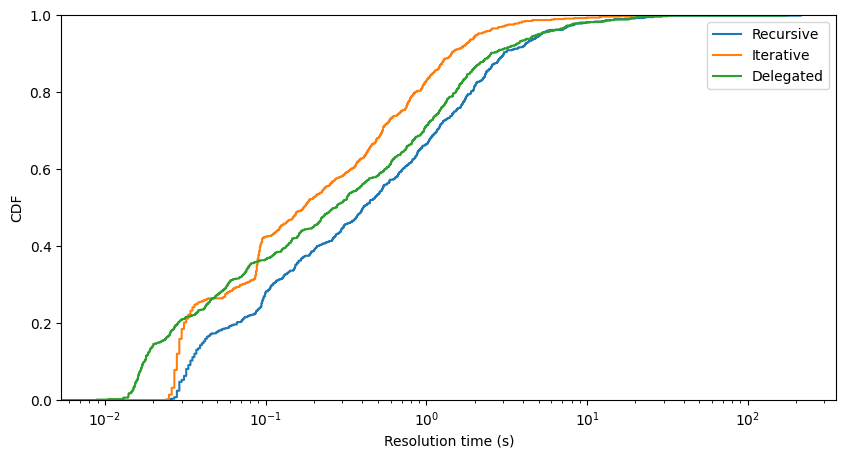

In [17]:
# plot comparison of recursive, iterative and delegated. We will plot cdf of all three values in one plot vs resolution time in seconds
plt.figure(figsize=(10, 5))
sns.ecdfplot(data=df, x='Recursive', label='Recursive')
sns.ecdfplot(data=df, x='Iterative', label='Iterative')
sns.ecdfplot(data=df, x='Delegated', label='Delegated')
plt.xlabel('Resolution time (s)')
plt.ylabel('CDF')
plt.Axes.set_xscale(plt.gca(), 'log')
plt.legend()
plt.show()


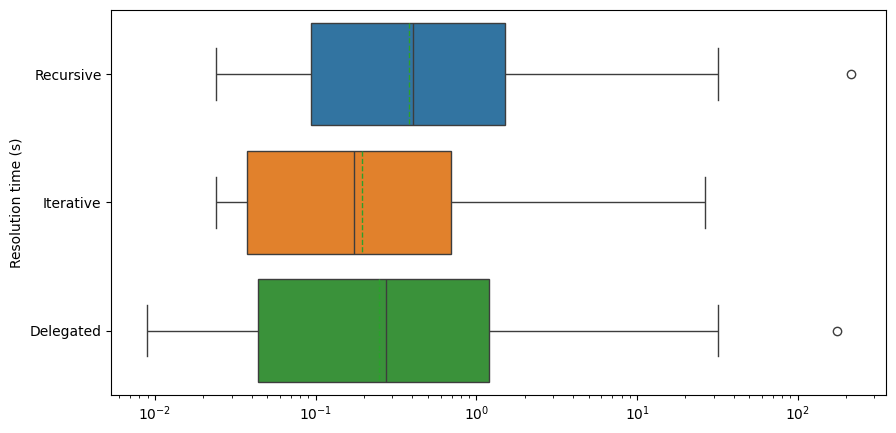

In [22]:
# next plot a boc plot for recursive, iterative and delgated where mean, the standarfd deviations are ploted. X axis is the type of resolution and Y axis is the resolution time in seconds
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Recursive', 'Iterative', 'Delegated']], showmeans=True, meanline=True, log_scale=True, orient='h')
plt.ylabel('Resolution time (s)')
plt.show()
